# Exploration 2: We don't live in a (totally) random world

Alright, I found that intriguing enough to play around with for a bit, but let's be real - heterogeneity isn't totally random. There are some patterns to it, and we can use those patterns to make better predictions. But! What are the processes that give rise to heterogeneity, particularly in the subsurface? Personally, I was never taught about statistical processes that generate these patterns so I fell back on two alternate hypotheses. First is the (boring) use of gaussian random fields, which is a common approach all over the place. I think it's a bit suspect from a physical perspective, but I know people use modifications of it for this purpose. Second, I use a model that (for better or worse) is a pet favorite of mine - the Ising model. It is derived from ideas in statistical physics and its foundations/core concepts pop up in many places from base concepts in ML on optimization to theoretical neuroscience. Let's see how these models change the perspective from a completely random world to one that is more structured.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.binary_grids import create_random_binary_grid, assign_k_values
from src.binary_grids import (
    exponential_covariance, 
    gaussian_covariance, 
    matern_covariance, 
    generate_gaussian_random_binary_field, 
    generate_ising_binary_field
)
from src.darcy_flow_problem_2d import solve_flow_problem, calculate_keff

In [2]:
def run_simulation(
    k_grid: np.ndarray,
    left_head=2.0, 
    right_head=1.0
):
    """
    Run complete simulation for a given set of parameters on
    a random binary grid.
    
    Args:
        size (int): Grid size
        percent_high_k (float): Percentage of high K cells
        k_high (float): High conductivity value
        k_low (float): Low conductivity value
        left_head (float): Left boundary head
        right_head (float): Right boundary head
        
    Returns:
        tuple: (K_effective, head distribution, K distribution)
    """
    # Create binary grid and assign K values
    # Solve flow problem
    head, flow_left, flow_right = solve_flow_problem(k_grid, left_head, right_head)
    
    # Use average of left and right flows
    avg_flow = (abs(flow_left) + abs(flow_right)) / 2
    
    # Calculate effective K
    k_eff = calculate_keff(avg_flow, domain_size=k_grid.shape[0])
    
    return k_eff, head, k_grid

/home/andrbenn/workspace/irc_feb_14/src/binary_grids.py:192: RuntimeWarning: divide by zero encountered in scalar divide
  beta = 1.0 / T


(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)


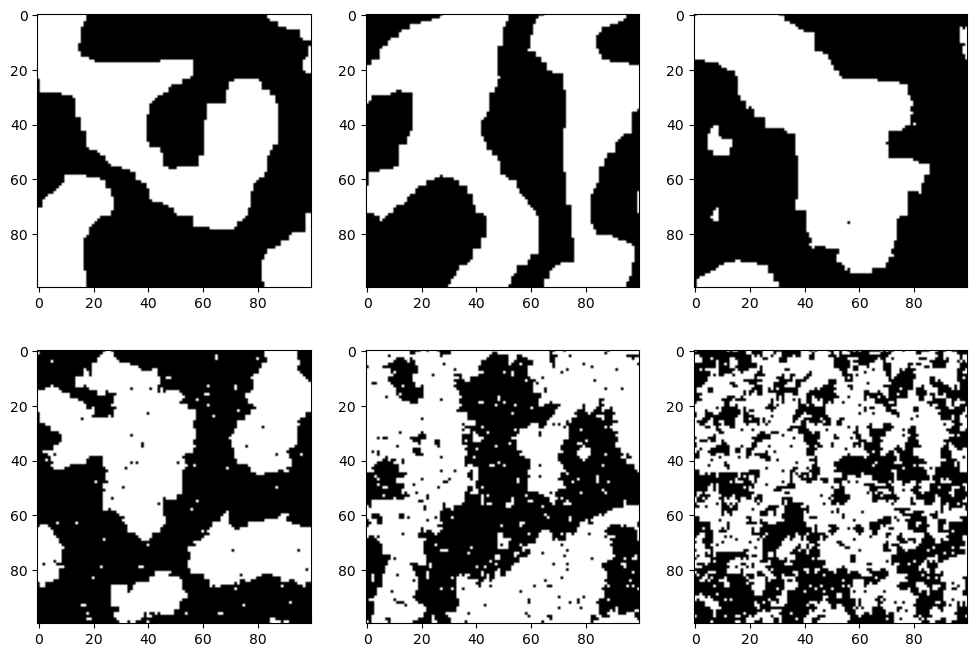

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()
for i, t in enumerate(np.linspace(0, 1, len(axes))): 
    ising_grid_example = generate_ising_binary_field(100, t*2.5, 1.0, 100)
    axes[i].imshow(ising_grid_example, cmap='gray')

In [4]:
num_runs = 100
k_low = 1e-4
k_high = 1.0

all_frac_high = []
all_k_eff = []

for i, t in enumerate(np.linspace(0.01, 1, num_runs)): 
    ising_grid_example = generate_ising_binary_field(100, t*2.5, 1.0, 100)
    frac_high = np.sum(ising_grid_example) / ising_grid_example.size
    k_grid = assign_k_values(ising_grid_example, k_low, k_high)
    k_eff, head, k_grid = run_simulation(k_grid)
    all_frac_high.append(frac_high)
    all_k_eff.append(k_eff)

(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)

In [5]:
ising_grid_example

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [6]:
all_frac_high

[0.4325,
 0.5397,
 0.5775,
 0.7011,
 0.564,
 0.2822,
 0.2936,
 0.4876,
 0.5796,
 0.3281,
 0.3863,
 0.4858,
 0.5576,
 0.557,
 0.5393,
 0.4898,
 0.4038,
 0.5355,
 0.4683,
 0.4104,
 0.5615,
 0.5262,
 0.6663,
 0.4963,
 0.5024,
 0.506,
 0.3784,
 0.6214,
 0.3529,
 0.5957,
 0.5818,
 0.6279,
 0.4398,
 0.353,
 0.3477,
 0.5122,
 0.5582,
 0.6397,
 0.4094,
 0.4344,
 0.3221,
 0.5176,
 0.3413,
 0.5513,
 0.481,
 0.4448,
 0.4438,
 0.5167,
 0.3872,
 0.4921,
 0.4371,
 0.7021,
 0.5099,
 0.2506,
 0.5181,
 0.4745,
 0.4896,
 0.6067,
 0.407,
 0.51,
 0.454,
 0.65,
 0.4836,
 0.4996,
 0.5065,
 0.4112,
 0.4967,
 0.5888,
 0.4677,
 0.3566,
 0.3921,
 0.6099,
 0.5418,
 0.4754,
 0.404,
 0.4932,
 0.5772,
 0.5821,
 0.5175,
 0.4516,
 0.4818,
 0.618,
 0.4753,
 0.4643,
 0.5531,
 0.5363,
 0.3731,
 0.4601,
 0.5009,
 0.4981,
 0.5288,
 0.5471,
 0.543,
 0.466,
 0.5746,
 0.5357,
 0.5299,
 0.5362,
 0.5031,
 0.5411]

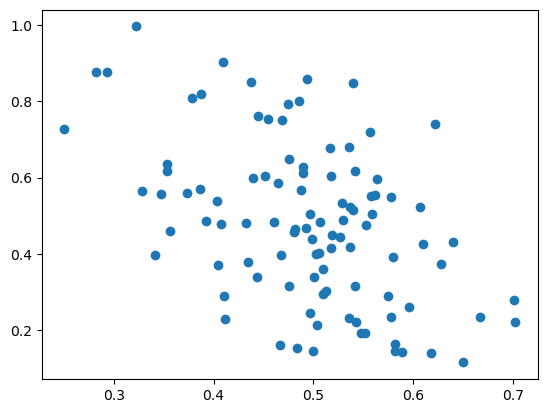

In [7]:
plt.scatter(all_frac_high, all_k_eff)

In [35]:
N = 100
T = 2.0
steps = 500

k_low = 1e-3
k_high = 1.0

n_iter = 30

frac_list = []
k_eff_list = []

for _ in range(n_iter):
    grid = generate_ising_binary_field(N, 1, T, steps=steps)
    grid[grid == -1] = 0
    frac_high_k = np.mean(grid)
    grid = assign_k_values(grid, k_low, k_high)
    k_eff, head, k_grid = run_simulation(k_grid=grid)
    frac_list.append(frac_high_k)
    k_eff_list.append(k_eff)

In [ ]:
plt.imshow(grid)

In [ ]:
plt.scatter(frac_list, k_eff_list)